# Checking Current Working Directory

In [1]:
import os 

In [2]:
os.getcwd()

'C:\\Users\\NIRANJAN\\Documents\\GitHub\\Training-Models-in-Python\\Logistic Regression'

# Importing Required Libraries

In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Importing File

In [4]:
bank_org = pd.read_csv("bank-full.csv")

In [5]:
bank = bank_org

# Performing EDA

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
bank.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
bank.shape

(45211, 17)

In [10]:
type(bank)

pandas.core.frame.DataFrame

In [11]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

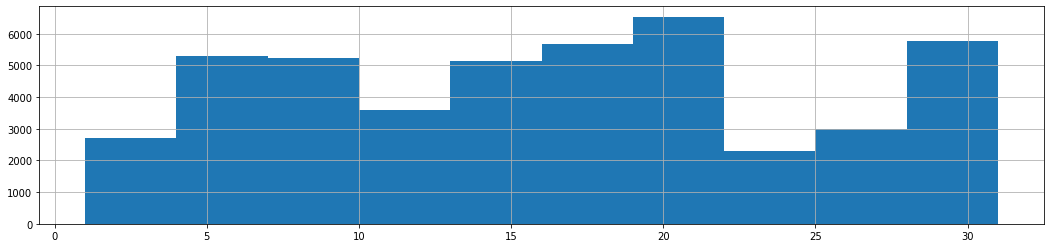

In [12]:
# checked histogram for each variable 
plt.figure(figsize=(18,4))
bank.day.hist()

In [13]:
# based on the histogram following variables are converted into categorical
bank['job'] = bank['job'].astype('category')
bank['marital'] = bank['marital'].astype('category')
bank['education'] = bank['education'].astype('category')
bank['default'] = bank['default'].astype('category')
bank['housing'] = bank['housing'].astype('category')
bank['loan'] = bank['loan'].astype('category')
bank['contact'] = bank['contact'].astype('category')
bank['month'] = bank['month'].astype('category')
bank['poutcome'] = bank['poutcome'].astype('category')
bank['y'] = bank['y'].astype('category')

In [14]:
bank.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [15]:
# converting day variable into categorical variable with 5 levels
for i in range(0,45211):
    if 0 < bank.day[i] < 8:
        bank.day[i] = "Week1"
    else:
        if 7 < bank.day[i] < 15:
            bank.day[i] = "Week2"
        else:
            if 14 < bank.day[i] < 22:
                bank.day[i] = "Week3"
            else:
                if 21 < bank.day[i] < 29:
                    bank.day[i] = "Week4"
                else:
                    bank.day[i] = "Week5"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C

In [16]:
bank['day'] = bank['day'].astype('category')

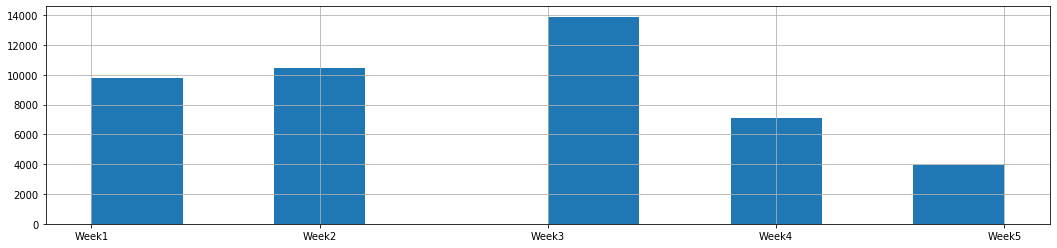

In [17]:
plt.figure(figsize=(18,4))
bank.day.hist()

In [18]:
bank.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

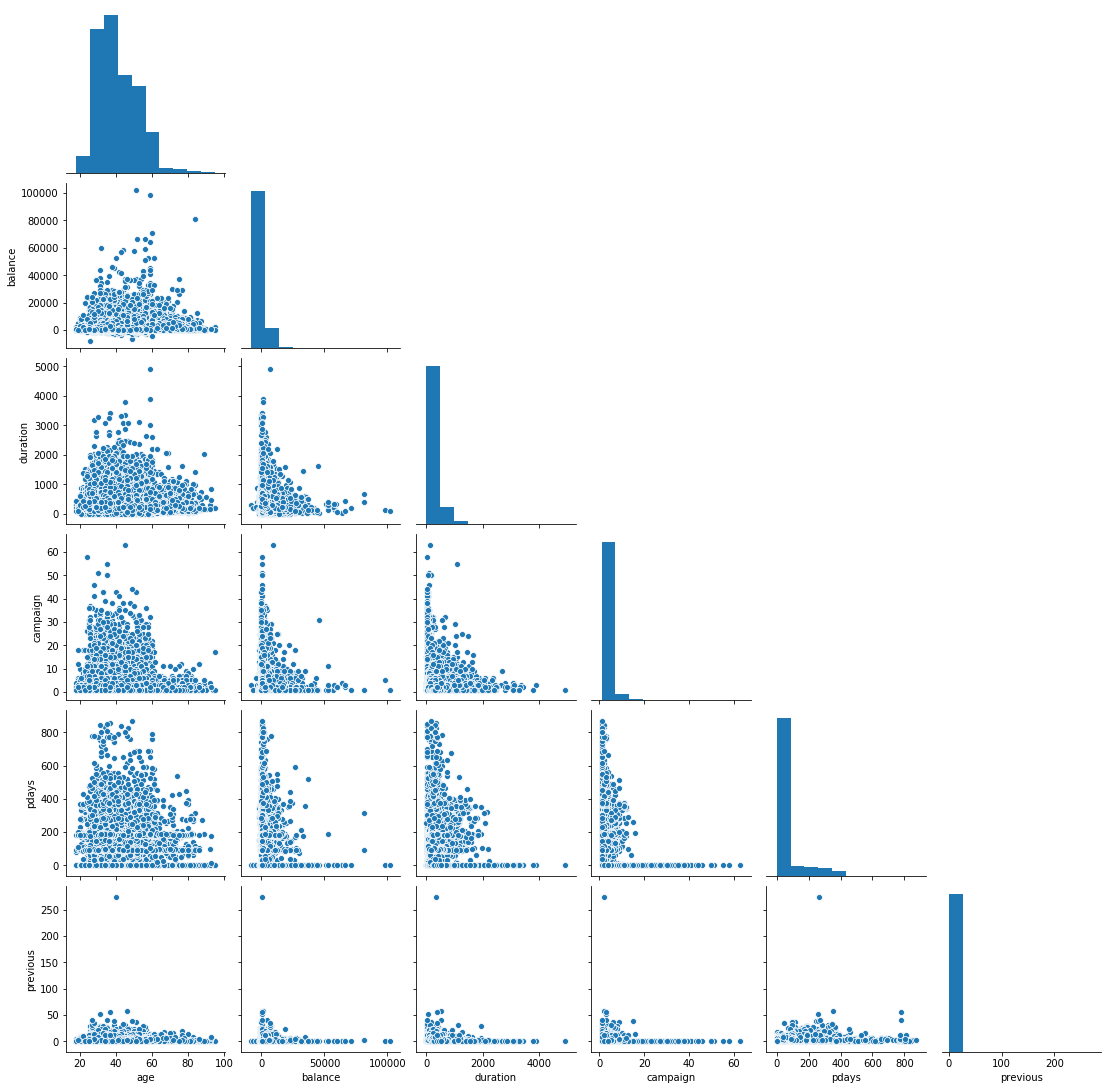

In [19]:
# checking for colinearity between variables
import seaborn as sns
sns.pairplot(bank, corner= True)

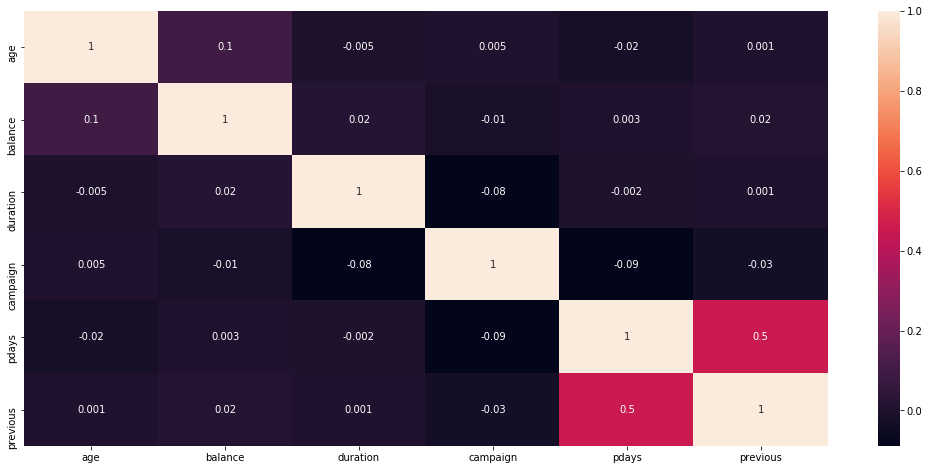

In [20]:
plt.figure(figsize=(18,8))
sns.heatmap(bank.corr(), annot = True,fmt='.1g')

## Creating dummy variables for categorical variables

In [21]:
bank_dummies = pd.get_dummies(bank[["job","marital", "education", "default", "housing", "loan", "contact", "day", "month","poutcome"]])

In [22]:
bank.drop(["job","marital", "education", "default", "housing", "loan", "contact", "day", "month","poutcome"],inplace=True,axis = 1)

In [23]:
bank.shape

(45211, 7)

In [24]:
bank = pd.concat([bank,bank_dummies],axis=1)

In [25]:
# converting y variable into '0' and '1'
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [26]:
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

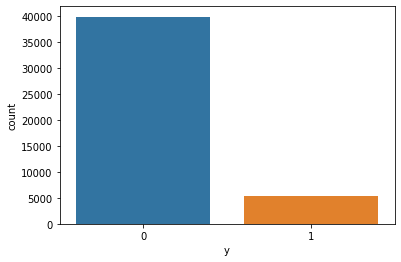

In [27]:
sns.countplot(x='y', data=bank)

In [28]:
bank.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'day_Week1', 'day_Week2',
       'day_Week3', 'day_Week4', 'day_Week5', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [29]:
# reshaping the column sequence. making y variable at last position
bank = bank[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'day_Week1', 'day_Week2',
       'day_Week3', 'day_Week4', 'day_Week5', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown','y']]

# Splitting Data into predictors(X) and dependent (Y)
## Splitting into train and test with 75/25 split

In [30]:
X = bank.iloc[:,:-1]
Y = bank.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.25, random_state=1)

# Building model 1 by sklearn.linear_model (LogisticRegression)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting test output y

In [34]:
y_pred = model1.predict(X_test)

## Checking model 1 aaccuracy

In [35]:
print("Accuracy",(model1.score(X_test,Y_test)))

Accuracy 0.8929487746615943


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
confusion_matrix

array([[9778,  220],
       [ 990,  315]], dtype=int64)

# Building model 2 by statsmodels.api (Logit)

In [37]:
import statsmodels.api as sm 

In [38]:
Logit = sm.Logit(Y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.238065
         Iterations 8


In [39]:
Logit.summary2()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.342     
Dependent Variable:        y                     AIC:                   16236.6007
Date:                      2020-06-18 01:10      BIC:                   16624.4454
No. Observations:          33908                 Log-Likelihood:        -8072.3   
Df Model:                  45                    LL-Null:               -12271.   
Df Residuals:              33862                 LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            8.0000                                                 
----------------------------------------------------------------------------------
                     Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------------------
age                 -0.0005       0.0025 -0.1877 0.8511       -0.0055       0.0045
balance              0.0000       0.0000  2.8996 0.0037        0.0000       0.0000
duration             0.0043       0.0001 56.9312 0.0000        0.0041       0.0044
campaign            -0.0880       0.0116 -7.6084 0.0000       -0.1107      -0.0654
pdays               -0.0001       0.0004 -0.2373 0.8124       -0.0008       0.0006
previous             0.0208       0.0121  1.7191 0.0856       -0.0029       0.0446
job_admin.           0.1071          nan     nan    nan           nan          nan
job_blue-collar     -0.2029          nan     nan    nan           nan          nan
job_entrepreneur    -0.3347          nan     nan    nan           nan          nan
job_housemaid       -0.4260          nan     nan    nan           nan          nan
job_management      -0.0727          nan     nan    nan           nan          nan
job_retired          0.3666          nan     nan    nan           nan          nan
job_self-employed   -0.2337          nan     nan    nan           nan          nan
job_services        -0.1062          nan     nan    nan           nan          nan
job_student          0.4898          nan     nan    nan           nan          nan
job_technician      -0.0812          nan     nan    nan           nan          nan
job_unemployed      -0.2245          nan     nan    nan           nan          nan
job_unknown         -0.2108          nan     nan    nan           nan          nan
marital_divorced    -0.3162          nan     nan    nan           nan          nan
marital_married     -0.4704  513440.6527 -0.0000 1.0000 -1006325.6579 1006324.7170
marital_single      -0.2041          nan     nan    nan           nan          nan
education_primary   -0.4052  535436.5261 -0.0000 1.0000 -1049436.7124 1049435.9020
education_secondary -0.2023  537312.6190 -0.0000 1.0000 -1053113.5839 1053113.1793
education_tertiary  -0.0192  564982.6853 -0.0000 1.0000 -1107345.7342 1107345.6959
education_unknown   -0.1542  559698.8897 -0.0000 1.0000 -1096989.8203 1096989.5119
default_no          -0.3531          nan     nan    nan           nan          nan
default_yes         -0.5801          nan     nan    nan           nan          nan
housing_no          -0.3161          nan     nan    nan           nan          nan
housing_yes         -0.9682          nan     nan    nan           nan          nan
loan_no             -0.2425          nan     nan    nan           nan          nan
loan_yes            -0.6466          nan     nan    nan           nan          nan
contact_cellular     0.2605          nan     nan    nan           nan          nan
contact_telephone    0.1052          nan     nan    nan           nan          nan
contact_unknown     -1.3609          nan     nan    nan           nan          nan
day_Week1           -0.3978 1698083.7725 -0.0000 1.0000 -3328183.4347 3328182.6390
d

## Predicting test output y

In [40]:
Pred2 = Logit.predict(X_test)
Pred2 = pd.DataFrame(Pred2)
Pred2 = Pred2.reset_index(drop=True)
Pred2.columns = ['y']

In [41]:
for i in range(0,11303):
    if Pred2.loc[i,'y'] < 0.5 :
        Pred2.loc[i,'y'] = 0
    else:
        Pred2.loc[i,'y'] = 1

## Checking model 2 aaccuracy

In [42]:
Y_test = pd.DataFrame(Y_test)
Y_test = Y_test.reset_index(drop=True)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(Y_test,Pred2)
confusion_matrix2

array([[9738,  260],
       [ 849,  456]], dtype=int64)

In [44]:
accuracy = sum(Y_test['y']==Pred2['y'])/Y_test.shape[0]
accuracy

0.9018844554543042